<a href="https://colab.research.google.com/github/Dwarkamoye/Python-CS5590-490-0001/blob/master/Deep_Learning-2/dp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Text(0.5, 1.0, 'Ground Truth : 5')

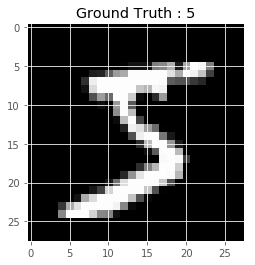

In [40]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [0]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [0]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')


In [0]:
#scale data
train_data /=255.0
test_data /=255.0


In [0]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [0]:
#creating network
model = Sequential()


model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [0]:
#model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
#model.add(Dense(512, activation='tanh'))
#model.add(Dense(256, activation='sigmoid'))
#model.add(Dense(64, activation='sigmoid'))
#model.add(Dense(10, activation='sigmoid'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2747 - acc: 0.9147 - val_loss: 0.1097 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0920 - acc: 0.9710 - val_loss: 0.0823 - val_acc: 0.9741
Epoch 3/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0584 - acc: 0.9820 - val_loss: 0.0701 - val_acc: 0.9779
Epoch 4/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0389 - acc: 0.9871 - val_loss: 0.0583 - val_acc: 0.9823
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0291 - acc: 0.9905 - val_loss: 0.0675 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.0212 - acc: 0.9934 - val_loss: 0.0744 - val_acc: 0.9808
Epoch 7/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0167 - acc: 0.9946 - val_loss: 0.0825 - 

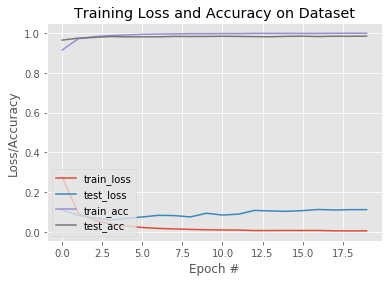

In [52]:
N = 20
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=N, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()